In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from func.generate_data import generate_data
from func.make_plotly_fig import make_plotly_fig
from func.classify import classify
from func.get_train_test import get_train_test


In [53]:
num_runs = 20
num_reps = 5
num_categs = 2
num_features = 2
average_test = False
average_test = False

In [54]:
df = generate_data(num_runs,num_reps, num_categs, num_features, cluster_std=2)
df

,feature_1,feature_2,y,CV
0,3.588594,1.610249,1,1.0
1,1.256369,1.637775,1,1.0
2,4.192286,-0.009108,1,1.0
3,0.780393,0.103120,1,1.0
4,4.041829,7.242505,0,1.0
...,...,...,...,...
195,3.438345,2.287162,1,20.0
196,3.964428,3.893471,0,20.0
197,5.515779,1.395056,0,20.0
198,2.876447,4.001073,0,20.0


/Users/mohamed/opt/anaconda3/lib/python3.9/site-packages/plotly/tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



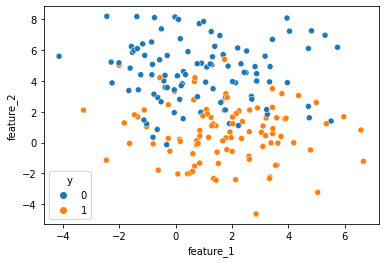

In [109]:
sns.scatterplot(x='feature_1', y='feature_2', hue='y', data=df)
# plotly figure
make_plotly_fig(df)


In [56]:
num_CVs = df['CV'].nunique()
accuracy = []
accuracy_avg = []


for iCV in range(1,num_CVs+1):

    accuracy_tmp=[]
    X_train, y_train, X_test, y_test = get_train_test(df,iCV,False)
    accuracy_tmp = classify(X_train, y_train, X_test, y_test)
    accuracy.append(accuracy_tmp)
    print(f'Number training samples: {X_train.shape[0]}')
    print(f'Number testing samples: {X_test.shape[0]}')
    print(f'-- -- -- -- -- ')
    
    accuracy_tmp=[]
    X_train, y_train, X_test, y_test = get_train_test(df,iCV,True)
    accuracy_tmp = classify(X_train, y_train, X_test, y_test)
    accuracy_avg.append(accuracy_tmp)
    print(f'Number training samples: {X_train.shape[0]}')
    print(f'Number testing samples with Averaging: {X_test.shape[0]}')
    print(f'-- -- -- -- -- ')
    




Number training samples: 190
Number testing samples: 10
-- -- -- -- -- 
Number training samples: 190
Number testing samples with Averaging: 2
-- -- -- -- -- 
Number training samples: 190
Number testing samples: 10
-- -- -- -- -- 
Number training samples: 190
Number testing samples with Averaging: 2
-- -- -- -- -- 
Number training samples: 190
Number testing samples: 10
-- -- -- -- -- 
Number training samples: 190
Number testing samples with Averaging: 2
-- -- -- -- -- 
Number training samples: 190
Number testing samples: 10
-- -- -- -- -- 
Number training samples: 190
Number testing samples with Averaging: 2
-- -- -- -- -- 
Number training samples: 190
Number testing samples: 10
-- -- -- -- -- 
Number training samples: 190
Number testing samples with Averaging: 2
-- -- -- -- -- 
Number training samples: 190
Number testing samples: 10
-- -- -- -- -- 
Number training samples: 190
Number testing samples with Averaging: 2
-- -- -- -- -- 
Number training samples: 190
Number testing samples:

In [57]:
d = {'Accuracy': accuracy, 'Accuracy_avg': accuracy_avg}
x= pd.DataFrame(d)

# sns.barplot(x.describe().columns, x.describe().loc['mean'],
#             errcolor='black', capsize=.2)

# sns.barplot(x.describe().columns, x.describe().loc['mean'],
#             errcolor='black', capsize=.2,
#             errwidth= x.describe().loc['std'])
x

,Accuracy,Accuracy_avg
0,0.9,1.0
1,0.9,1.0
2,1.0,1.0
3,0.8,1.0
4,0.9,1.0
5,0.7,1.0
6,0.8,1.0
7,0.8,1.0
8,0.6,0.5
9,0.8,1.0


In [58]:
plot_df = pd.DataFrame(pd.concat((x['Accuracy'],x['Accuracy_avg']),axis=0))
plot_df = plot_df.rename(columns={0: "accuracy"})
plot_df['is_avg'] =np.concatenate((np.zeros(num_CVs),np.ones(num_CVs)),axis=0)
plot_df['area'] = 0
plot_df

,accuracy,is_avg,area
0,0.9,0.0,0
1,0.9,0.0,0
2,1.0,0.0,0
3,0.8,0.0,0
4,0.9,0.0,0
5,0.7,0.0,0
6,0.8,0.0,0
7,0.8,0.0,0
8,0.6,0.0,0
9,0.8,0.0,0


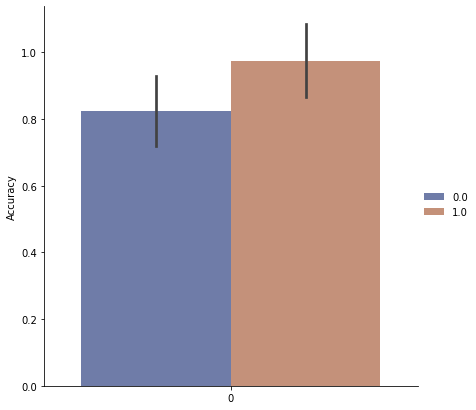

In [59]:

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=plot_df, kind="bar",
    x='area', y="accuracy", hue="is_avg",
    ci="sd", palette="dark", alpha=.6, height=6
)
# g.despine(left=True)
g.set_axis_labels("", "Accuracy")
g.legend.set_title("")
# g.legend.texts(['Test - All','Test - Averaged'])

In [107]:
# import plotly.plotly as py
import plotly.graph_objs as go

# create offline plotly bar plot from dataframe
def make_figure(df):
    # create offline plotly bar plot from dataframe
    # create offline plotly bar plot from dataframe
    
    # calculate standard error of the mean
    sem = np.std(x, axis=0, ddof=1) / np.sqrt(x.shape[0])*100
    sem = sem.values.tolist()
    
    average_values = df.mean()*100
    average_values = average_values.values.tolist()
    fig = go.Figure(data=go.Scatter(
            x= [0 ,1],
            y=average_values,
            error_y=dict(
                type='data', # value of error bar given in data coordinates
                array=sem,
                visible=True)
        ))
    
    fig.show()
    
    # return go.Figure(data=data, layout=layout)
    
make_figure(x)


In [86]:
x.mean()*100

Accuracy        82.5
Accuracy_avg    97.5
dtype: float64

In [73]:
x.mean()[0]

0.825

In [98]:
sem * 100

Accuracy        2.392422
Accuracy_avg    2.500000
dtype: float64

In [101]:
np.std(x, axis=0, ddof=1) / np.sqrt(x.shape[0])

Accuracy        0.023924
Accuracy_avg    0.025000
dtype: float64

In [110]:
import sklearn.datasets 